In [1]:
N = (1 + 4) % 5 + 1
print("Варіант:", N)

Варіант: 1


## Завдання 1
#### Обрати перші 8 рядків з набору даних

In [2]:
import pandas as pd
from IPython.display import display

# Читач CSV
df = pd.read_csv('./NationalNames.csv')

# Універсальна функція для читання CSV файлу
def load_csv(df, start=None, end=None):
    """
    Load a CSV file and return a DataFrame slice.
    
    Parameters:
    df (str): CSV reader.
    start (int): The starting index for the slice (optional).
    end (int): The ending index for the slice (optional).
    
    Returns:
    pd.DataFrame: The sliced DataFrame.
    """
    # Якщо start та end вказані, повертає зріз
    if start is not None or end is not None:
        return df[start:end]
    return df

# Використання функції для відображення перших 8 рядків
first_8_rows = load_csv(df, start=0, end=8)

# Табличне відображення даних
display(first_8_rows)


,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746
5,6,Margaret,1880,F,1578
6,7,Ida,1880,F,1472
7,8,Alice,1880,F,1414


## Завдання 2
#### Обрати останні 8 радків з набору даних

In [3]:
# Використання функції для відображення перших 8 рядків
last_8_rows = load_csv(df, start=-8)

# Табличне відображення даних
display(last_8_rows)

,Id,Name,Year,Gender,Count
1825425,1825426,Zo,2014,M,5
1825426,1825427,Zyeir,2014,M,5
1825427,1825428,Zyel,2014,M,5
1825428,1825429,Zykeem,2014,M,5
1825429,1825430,Zymeer,2014,M,5
1825430,1825431,Zymiere,2014,M,5
1825431,1825432,Zyran,2014,M,5
1825432,1825433,Zyrin,2014,M,5


## Завдання 3
#### Повернути імена стовбців набору даних

In [4]:
column_names = df.columns.tolist()

print(column_names)

['Id', 'Name', 'Year', 'Gender', 'Count']


## Завдання 4
#### Знайти кількість унікальних імен в наборі даних

In [5]:
unique_count = df['Name'].nunique()
print(unique_count)

93889


## Завдання 5
#### Підрахунок унікальних імен у кожному році

In [6]:
# Підрахунок кількості унікальних імен для кожного року
unique_names_per_year = df.groupby('Year')['Name'].nunique().reset_index()

# Перейменування стовпців для ясності
unique_names_per_year.columns = ['Year', 'Name']

# Встановлення 'Year' як індекса для зручного відображення
unique_names_per_year.set_index('Year', inplace=True)

# Табличне відображення даних
display(unique_names_per_year)

,Name
Year,
1880,1889
1881,1830
1882,2012
1883,1962
1884,2158
...,...
2010,31603
2011,31418
2012,31236


## Завдання 6
#### Знайти рік із найбільшою кількістю унікальних імен

In [7]:
year_with_max_unique_names = unique_names_per_year[unique_names_per_year['Name'] == unique_names_per_year['Name'].max()]

display(year_with_max_unique_names)

,Name
Year,
2008,32488


## Завдання 7
#### Знайти найпопулярніше ім'я року з найбільшою кількістю популярних імен

In [8]:
# Знаходимо рік з найбільшою кількістю унікальних імен і найпопулярніше ім'я в цьому році
most_popular_name = df[df['Year'] == unique_names_per_year['Name'].idxmax()].sort_values(by='Count', ascending=False).iloc[0]['Name']

print(most_popular_name)


Jacob


## Завдання 8
#### Знайти рік, коли ім'я "Jacob" було найпопулярнішим серед жіночих імен

In [9]:
# Filter the data to include only rows where the name is "Jacob" and gender is "F"
jacob_female_data = df[(df['Name'] == 'Jacob') & (df['Gender'] == 'F')]

# Find the year when "Jacob" was most popular among female names based on the highest count
most_popular_jacob_female = jacob_female_data.loc[jacob_female_data['Count'].idxmax()]

# Display the entire row for complete information
display(most_popular_jacob_female.to_frame().T)


,Id,Name,Year,Gender,Count
1455556,1455557,Jacob,2004,F,171


## Завдання 9
#### Знайти рік з найбільшою кількістю гендерно-нейтральних імен

In [10]:
# Визначаємо рік з найбільшою кількістю гендерно-нейтральних імен
result_table = (
    df.groupby(['Year', 'Name'])['Gender']
    .nunique()
    .reset_index()
    .query('Gender == 2')  # Фільтруємо імена, які є гендерно-нейтральними
    .groupby('Year')
    .size()
    .idxmax()  # Знаходимо рік з максимальною кількістю гендерно-нейтральних імен
)

# Отримуємо кількість гендерно-нейтральних імен для цього року
max_count = (
    df.groupby(['Year', 'Name'])['Gender']
    .nunique()
    .reset_index()
    .query('Gender == 2')
    .groupby('Year')
    .size()
    .max()
)

# Формуємо таблицю результатів
final_result = pd.DataFrame({
    'Year': [result_table],
    'Gender_neutral_names': [max_count]
}).set_index('Year')

# Відображення таблиці
display(final_result)

,Gender_neutral_names
Year,
2008,2557


## Завдання 10
#### Знайти загальну кількість народжень за кожен рік

In [11]:
# Calculate the total number of births per year by summing the 'Count' column for each year
births_per_year = df.groupby('Year')['Count'].sum().reset_index()

# Rename columns to match the desired format
births_per_year.columns = ['Year', 'Count']

# Set 'Year' as the index to resemble the requested table structure
births_per_year.set_index('Year', inplace=True)

# Display the table
display(births_per_year)


,Count
Year,
1880,201484
1881,192699
1882,221538
1883,216950
1884,243467
...,...
2010,3686589
2011,3646730
2012,3643336


## Завдання 11
#### Знайти і вивести рік найбільшої народжуваності 

In [12]:
year_with_max_births = births_per_year['Count'].idxmax()

print(year_with_max_births)

1957


## Завдання 12
#### Знайти і вивести всі роки з кількістю дівчат та хлопців

In [13]:
births_by_gender_per_year = df.pivot_table(values='Count', index='Year', columns='Gender', aggfunc='sum')

display(births_by_gender_per_year)

Gender,F,M
Year,,
1880,90993,110491
1881,91954,100745
1882,107850,113688
1883,112321,104629
1884,129022,114445
...,...,...
2010,1772738,1913851
2011,1753500,1893230
2012,1753922,1889414


## Завдання 13
#### Підрахувати кількість років коли дівчат народжувалось більше за хлопців

In [14]:
years_more_girls_than_boys = births_by_gender_per_year[births_by_gender_per_year['F'] > births_by_gender_per_year['M']].shape[0]

print(years_more_girls_than_boys) 

54


## Завдання 14
#### Підрахувати кількість разів, коли хлопців називали ім'ям "Barbara"

In [15]:
barbara_male_count = df[(df['Name'] == 'Barbara') & (df['Gender'] == 'M')]['Count'].sum()

print(barbara_male_count)

4139


## Завдання 15
#### Підрахувати кількість років проведення спостережень

In [16]:
years_of_observation = df['Year'].nunique()

print(f"Спостереження проводилось {years_of_observation} років")

Спостереження проводилось 135 років


## Завдання 16
#### Знайти найпопулярніші гендерно-нейтральні імена, що присутні кожного року

In [17]:
# Крок 1: Визначаємо загальну кількість років у наборі даних
total_years = df['Year'].nunique()

# Крок 2: Фільтруємо гендерно-нейтральні імена, які присутні в обох статях кожного року
gender_neutral_names = (
    df.groupby(['Name', 'Year'])['Gender']
    .nunique()
    .reset_index()
    .query("Gender == 2")
)

# Крок 3: Знаходимо імена, що з'являються кожного року
gender_neutral_names_all_years = (
    gender_neutral_names.groupby('Name')
    .size()
    .reset_index(name='Years')
    .query('Years == @total_years')
)

# Крок 4: Рахуємо загальну кількість використань кожного імені та сортуємо за спаданням
sorted_gender_neutral_names = (
    df[df['Name'].isin(gender_neutral_names_all_years['Name'])]
    .groupby('Name')['Count']
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

# Відображення результату
display(sorted_gender_neutral_names)

,Name,Count
0,James,5129096
1,John,5106590
2,Robert,4816785
3,William,4071368
4,Joseph,2580687
5,Jean,480901
6,Jesse,421406
7,Leslie,376587
8,Francis,312147
9,Lee,291691


## Завдання 17
#### Знайти найпопулярніше ім'я серед непопулярних

In [18]:
# Крок 1: Фільтруємо набір даних для рядків, де "Count" дорівнює мінімальному значенню (5)
min_count_value = df['Count'].min()
least_popular_names_data = df[df['Count'] == min_count_value]

# Крок 2: Групуємо дані за "Name" і обчислюємо загальний "Count" для кожного імені
total_least_popular_names = least_popular_names_data.groupby('Name')['Count'].sum().reset_index()

# Крок 3: Знаходимо "найпопулярніше" серед цих найменш популярних імен, вибираючи ім'я з найбільшим загальним числом
most_popular_among_least = total_least_popular_names.sort_values(by='Count', ascending=False).head(1)

# Витягуємо значення імені та кількості для фінального виводу
most_popular_name = most_popular_among_least.iloc[0]['Name']
most_popular_count = most_popular_among_least.iloc[0]['Count']

# Виводимо результат у потрібному форматі
print(f"Найбільш популярне серед непопулярних імен — це {most_popular_name}. Ним назвали {most_popular_count} разів.")

Найбільш популярне серед непопулярних імен — це Celester. Ним назвали 160 разів.


## Завдання 18
#### Побудувати графік розподілу кількості жіночих імен "John" та чоловічих імен "Mary" по роках 

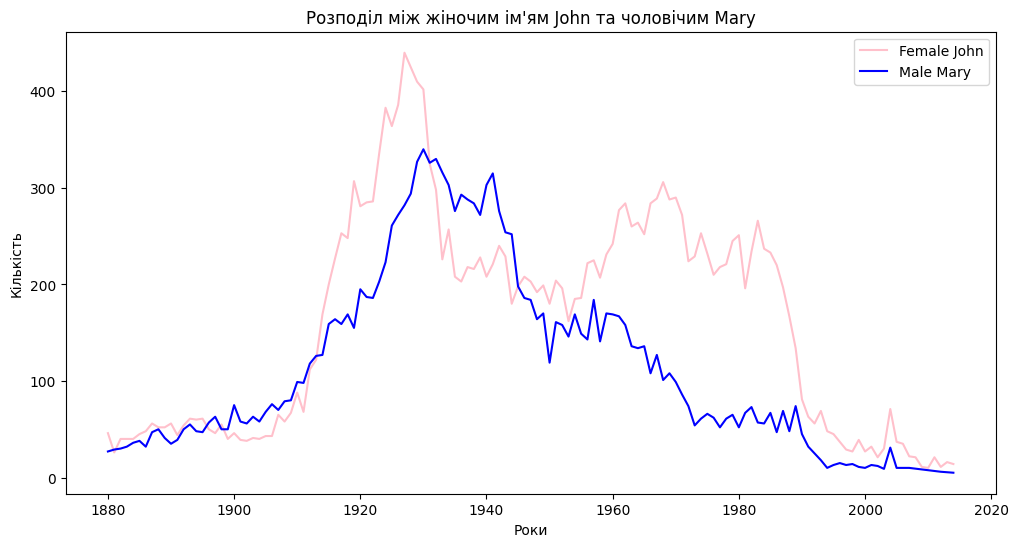

In [19]:
import matplotlib.pyplot as plt

# Фільтрація даних відносно імен
female_john = df[(df['Name'] == 'John') & (df['Gender'] == 'F')]
male_mary = df[(df['Name'] == 'Mary') & (df['Gender'] == 'M')]

# Графік розподілу
plt.figure(figsize=(12, 6))
plt.plot(female_john['Year'], female_john['Count'], label="Female John", color='pink')
plt.plot(male_mary['Year'], male_mary['Count'], label="Male Mary", color='blue')
plt.xlabel("Роки")
plt.ylabel("Кількість")
plt.title("Розподіл між жіночим ім'ям John та чоловічим Mary")
plt.legend()
plt.show()
